In [1]:
#Importar paquetes de herramientas:
#Datos
import pandas as pd
import numpy as np
import re
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
# Importamos librerias de PCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score , rand_score
import sklearn.metrics as metrics


### Dataset

In [3]:
#Importamos los 12 datasets de cada uno de los meses del año 2020
robos_df_ene = pd.read_excel('dnrpa-robos-recuperos-autos-202001.xlsx') #df = Data Frame
robos_df_feb = pd.read_excel('dnrpa-robos-recuperos-autos-202002.xlsx') #df = Data Frame
robos_df_mar = pd.read_excel('dnrpa-robos-recuperos-autos-202003.xlsx') #df = Data Frame
robos_df_abr = pd.read_excel('dnrpa-robos-recuperos-autos-202004.xlsx') #df = Data Frame
robos_df_may = pd.read_excel('dnrpa-robos-recuperos-autos-202005.xlsx') #df = Data Frame
robos_df_jun = pd.read_excel('dnrpa-robos-recuperos-autos-202006.xlsx') #df = Data Frame
robos_df_jul = pd.read_excel('dnrpa-robos-recuperos-autos-202007.xlsx') #df = Data Frame
robos_df_ago = pd.read_excel('dnrpa-robos-recuperos-autos-202008.xlsx') #df = Data Frame
robos_df_sep = pd.read_excel('dnrpa-robos-recuperos-autos-202009.xlsx') #df = Data Frame
robos_df_oct = pd.read_excel('dnrpa-robos-recuperos-autos-202010.xlsx') #df = Data Frame
robos_df_nov = pd.read_excel('dnrpa-robos-recuperos-autos-202011.xlsx') #df = Data Frame
robos_df_dic = pd.read_excel('dnrpa-robos-recuperos-autos-202012.xlsx') #df = Data Frame

In [4]:
#Concatenamos los 12 datasets en un unico data set
robos_df_total = pd.concat([robos_df_ene, robos_df_feb,robos_df_mar,robos_df_abr,robos_df_may,robos_df_jun,robos_df_jul,robos_df_ago,
                           robos_df_sep,robos_df_oct,robos_df_nov,robos_df_dic], ignore_index = True)

### Pre procesamiento: 

In [5]:
#Visualizamos la cantidad de columnas y filas que tiene nuestro dataset
filas = np.shape(robos_df_total)[0] 
print(f'Filas: {filas}')

columnas = np.shape(robos_df_total)[1]
print(f'Columnas: {columnas}\r\n')
#Imprimimos un head de 5 registros de nuestro dataset
print('Output de ".head(5)": ')
robos_df_total.head(5) 

Filas: 24546
Columnas: 25

Output de ".head(5)": 


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2000-11-01,1077,QUILMES Nº 1,Buenos Aires,Nacional,2000.0,17.0,SEDAN 5 PUERTAS,...,Privado,Física,BERNAL,BUENOS AIRES,Masculino,1986.0,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2019-04-16,1244,LA MATANZA Nº 11,Buenos Aires,Protocolo 21,2019.0,4.0,RURAL 5 PUERTAS,...,Privado,Física,RAMOS MEJÍA,BUENOS AIRES,Femenino,1959.0,ARGENTINA,100,6,ARG
2,COMUNICACIÓN DE RECUPERO,2020-01-16,2006-05-10,1043,LA PLATA Nº 01,Buenos Aires,Nacional,2006.0,NaN,FGON.VID.C/ASIENTOS,...,Privado,Jurídica,LA PLATA,BUENOS AIRES,No aplica,2000.0,No aplica,100,6,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2016-01-12,1236,OLIVOS Nº 09,Buenos Aires,Nacional,2016.0,20.0,PICK-UP,...,Privado,Física,FLORIDA-VTE. LOPEZ,BUENOS AIRES,Masculino,1980.0,ARGENTINA,100,6,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-24,2019-08-12,1161,ESTEBAN ECHEVERRIA Nº 2,Buenos Aires,Protocolo 21,2019.0,5.0,SEDAN 5 PUERTAS,...,Privado,Física,CANNING,BUENOS AIRES,No identificado,1983.0,ARGENTINA,100,6,ARG


In [8]:
#visualizamos si nuestras columnas tienen valores nulos o no.
col_nulls =robos_df_total.isnull().any()
print(col_nulls, '\r\n')

tramite_tipo                       True
tramite_fecha                     False
fecha_inscripcion_inicial         False
registro_seccional_codigo         False
registro_seccional_descripcion    False
registro_seccional_provincia      False
automotor_origen                  False
automotor_anio_modelo              True
automotor_tipo_codigo              True
automotor_tipo_descripcion        False
automotor_marca_codigo             True
automotor_marca_descripcion        True
automotor_modelo_codigo            True
automotor_modelo_descripcion       True
automotor_uso_codigo              False
automotor_uso_descripcion         False
titular_tipo_persona              False
titular_domicilio_localidad        True
titular_domicilio_provincia       False
titular_genero                    False
titular_anio_nacimiento            True
titular_pais_nacimiento           False
titular_porcentaje_titularidad    False
titular_domicilio_provincia_id    False
titular_pais_nacimiento_id         True


In [9]:
#Visualizamos la cantidad de valores nulos en las primeras 6 columnas
total = robos_df_total.isnull().sum().sort_values(ascending=False)
percent = (robos_df_total.isnull().sum()/robos_df_total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
titular_pais_nacimiento_id,1530,0.062332
automotor_tipo_codigo,891,0.036299
automotor_modelo_codigo,429,0.017477
automotor_marca_codigo,391,0.015929
automotor_anio_modelo,61,0.002485
titular_domicilio_localidad,31,0.001263


In [10]:
#Eliminamos las columnas que no son necesarias para el análisis
robos_df_total.drop(["automotor_uso_codigo","titular_pais_nacimiento_id","titular_porcentaje_titularidad","titular_pais_nacimiento","automotor_uso_descripcion","titular_tipo_persona"], axis=1,inplace=True)


In [11]:
#Limpiamos todos los registros con valores nulos
robos_df_total.dropna(how ='any', inplace = True)

In [12]:
# Verificamos como quedo el data-set
print(f'Nos quedamos con un df de {robos_df_total.shape[0]} filas x{robos_df_total.shape[1]} columnas')
robos_df_total.shape

Nos quedamos con un df de 23446 filas x19 columnas


(23446, 19)

In [13]:
#Unificamos los datos para tener mediciones por mes
robos_df_total.tramite_fecha = pd.to_datetime(robos_df_total.tramite_fecha) #### indicar que columna queremos transformar #####
#Agregamos la columna de MES
robos_df_total['mes'] = robos_df_total.tramite_fecha.dt.month #creamos una nueva columna "year" con .dt.year sobre la col "indice_tiempo"
robos_df_total.head(-5)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_domicilio_provincia_id,mes
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2000-11-01,1077,QUILMES Nº 1,Buenos Aires,Nacional,2000.0,17.0,SEDAN 5 PUERTAS,19,FORD,JD,ESCORT LX 1.8 5P D,BERNAL,BUENOS AIRES,Masculino,1986.0,6,1
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2019-04-16,1244,LA MATANZA Nº 11,Buenos Aires,Protocolo 21,2019.0,4.0,RURAL 5 PUERTAS,112,RENAULT,A61,CAPTUR INTENS 2.0,RAMOS MEJÍA,BUENOS AIRES,Femenino,1959.0,6,1
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-10,2016-01-12,1236,OLIVOS Nº 09,Buenos Aires,Nacional,2016.0,20.0,PICK-UP,29,MERCEDES BENZ,DT,SPRINTER 415 CDI-CH 3665,FLORIDA-VTE. LOPEZ,BUENOS AIRES,Masculino,1980.0,6,1
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-24,2019-08-12,1161,ESTEBAN ECHEVERRIA Nº 2,Buenos Aires,Protocolo 21,2019.0,5.0,SEDAN 5 PUERTAS,104,PEUGEOT,861,208 ALLURE 1.6 115,CANNING,BUENOS AIRES,No identificado,1983.0,6,1
5,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-01-23,2011-08-02,1237,LOMAS DE ZAMORA Nº 7,Buenos Aires,Nacional,2011.0,90.0,MINIBUS,29,MERCEDES BENZ,AZ,SPRINTER 313 CDI/C 3550,LOMAS DE ZAMORA,BUENOS AIRES,Masculino,1962.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24536,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-11,1999-04-19,21075,SAN LORENZO Nº 4,Santa Fe,Nacional,1999.0,17.0,SEDAN 5 PTAS,37,RENAULT,BW,MEGANE RT,CAPITAN BERMUDEZ,SANTA FE,Masculino,1966.0,82,12
24537,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-29,2005-02-24,21075,SAN LORENZO Nº 4,Santa Fe,Protocolo 21,2005.0,2.0,SEDAN 4 PTAS,44,FIAT,557,SIENA EX TD,CAPITAN BERMUDEZ,SANTA FE,Masculino,1980.0,82,12
24538,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-29,1998-09-28,22002,FRIAS,Santiago del Estero,Protocolo 21,1998.0,5.0,SEDAN 5 PTAS,136,VOLKSWAGEN,202,GOL GL 1.6 MI,FRIAS,SGO.DEL ESTERO,No identificado,1982.0,86,12
24539,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2020-12-29,2007-06-19,22002,FRIAS,Santiago del Estero,Nacional,2007.0,12.0,SEDAN 4 PTAS,37,RENAULT,SF,CLIO TRIC PACK 1.5 DIE DA AA/2007,FRIAS,SGO.DEL ESTERO,Masculino,1986.0,86,12


In [14]:
# Guardamos en una variable la cantidad de marcas
q_marcas = len(robos_df_total['automotor_marca_descripcion'].unique())
print(f'En total hay {q_marcas} marcas\r\n')
# Mostramos en la cell los tipos de marcas existentes
print("\n", robos_df_total['automotor_marca_descripcion'].unique())

En total hay 119 marcas


 ['FORD' 'RENAULT' 'MERCEDES BENZ' 'PEUGEOT' 'CHEVROLET' 'VOLKSWAGEN'
 'FIAT' 'LIFAN' 'DFSK' 'CITROEN' 'NISSAN' 'IVECO' 'HELVETICA' 'TOYOTA'
 'CHERY' 'HONDA' 'AUDI' 'MITSUBISHI' 'KIA' 'ALFA ROMEO' 'SCANIA' 'BMW'
 'PETINARI' 'A.F.F.' 'DODGE' 'HYUNDAI' 'SEAT' 'SUZUKI' 'CHRYSLER'
 'CITROËN' 'JEEP' 'M. BENZ' 'MINI' 'PATRONELLI' 'OMBU' 'ISUZU' 'DAEWOO'
 'VOLVO' 'GALLOPER' 'SSANGYONG' 'DIMEX' 'SALTO' 'OPEL' 'AGRALE'
 'H.C. MANCINI' 'DS' 'TATA' 'ROVER' 'RENUALT' '.TOYOTA'
 'SIN ESPECIFICACION' 'FORD FALCON' 'MANQUE' 'SUBARU' 'MERCEDES-BENZ'
 'GOLONDRINA' 'MAZDA' 'PORSCHE' 'AST-PRA' 'SEVEL' 'FOTON' 'LAND ROVER'
 'SSANYONG' 'MONTENEGRO' 'BONANO' 'RAMBLER IKA' 'GMC' 'VOLKWAGEN' 'RUTERA'
 'DAIHATSU' 'INTEGRAL' 'FARGO' 'JAC' 'ARO' 'HERMANN' 'RANDON' 'EL FIERRO'
 'LAMBERT' 'FRUEHAUF' 'SOLA Y BRUSA' 'POLARIS' 'DAEWO' '3PEUGEOT' 'SAAB'
 'RAM' 'RIMEK' 'FACCHINI' 'NIÑO JESUS DE PRAGA' 'SAMSUNG' 'INNOCENTI'
 'BAIC' 'VOKSWAGEN' 'CORMETAL' 'DEPAOLI' 'SAAB SCANIA' 'NAKAI'
 'VOLSKW

In [15]:
#Estandarizamos la información y corregimos los valores mal cargados utilizando str. replace
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('M. BENZ','MERCEDES BENZ')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-136-VOLKSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('RENUALT','RENAULT')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('.TOYOTA','TOYOTA')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FORD FALCON','FORD')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('MERCEDES-BENZ','MERCEDES BENZ')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('SSANYONG','SSANGYONG')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOLKWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('3PEUGEOT','PEUGEOT')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOKSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-024-CHEVROLET','CHEVROLET')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FORD (047)','FORD -047-')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FIAT (044)','FIAT -044-')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOLSKWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace("TOYOTA (030)",'TOYOTA -030-')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('REANULT','RENAULT')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('FORS','FORD')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('CHEVROELT','CHEVROLET')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('MERCEDEZ BENZ','MERCEDES BENZ')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('VOLSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-136- VOLKSWAGEN','VOLKSWAGEN')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('CHEVROET','CHEVROLET')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('-072-KIA','KIA')
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].str.replace('CITROEN','CITROËN')


In [16]:
# Una vez corregido los valores mal cargados visualizamos la cantidad de marcas que resultaron
q_marcas = len(robos_df_total['automotor_marca_descripcion'].unique())
print(f'En total hay {q_marcas} marcas\r\n')
# Mostramos en la cell los tipos de marcas resultantes
print("\n", robos_df_total['automotor_marca_descripcion'].unique())

En total hay 102 marcas


 ['FORD' 'RENAULT' 'MERCEDES BENZ' 'PEUGEOT' 'CHEVROLET' 'VOLKSWAGEN'
 'FIAT' 'LIFAN' 'DFSK' 'CITROËN' 'NISSAN' 'IVECO' 'HELVETICA' 'TOYOTA'
 'CHERY' 'HONDA' 'AUDI' 'MITSUBISHI' 'KIA' 'ALFA ROMEO' 'SCANIA' 'BMW'
 'PETINARI' 'A.F.F.' 'DODGE' 'HYUNDAI' 'SEAT' 'SUZUKI' 'CHRYSLER' 'JEEP'
 'MINI' 'PATRONELLI' 'OMBU' 'ISUZU' 'DAEWOO' 'VOLVO' 'GALLOPER'
 'SSANGYONG' 'DIMEX' 'SALTO' 'OPEL' 'AGRALE' 'H.C. MANCINI' 'DS' 'TATA'
 'ROVER' 'SIN ESPECIFICACION' 'MANQUE' 'SUBARU' 'GOLONDRINA' 'MAZDA'
 'PORSCHE' 'AST-PRA' 'SEVEL' 'FOTON' 'LAND ROVER' 'MONTENEGRO' 'BONANO'
 'RAMBLER IKA' 'GMC' 'RUTERA' 'DAIHATSU' 'INTEGRAL' 'FARGO' 'JAC' 'ARO'
 'HERMANN' 'RANDON' 'EL FIERRO' 'LAMBERT' 'FRUEHAUF' 'SOLA Y BRUSA'
 'POLARIS' 'DAEWO' 'SAAB' 'RAM' 'RIMEK' 'FACCHINI' 'NIÑO JESUS DE PRAGA'
 'SAMSUNG' 'INNOCENTI' 'BAIC' 'CORMETAL' 'DEPAOLI' 'SAAB SCANIA' 'NAKAI'
 'YUEJIN' 'PROTON' 'PLUSCARGA' 'DEUTZ - AGRALE' 'ULTRANS' 'DFM' 'GRASSANI'
 'GMC CHEVETTE' 'SMART' 'RASTROJERO DIESEL' 'IES' '

In [17]:
#Eliminamos los registros con valores que no corresponden a marcas existentes en el mercado, para eso reemplazamos el valor
# por un Nan

robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('SALTO',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('MANQUE',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('SIN ESPECIFICACION',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('GOLONDRINA',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('MONTENEGRO',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('RUTERA',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('INTEGRAL',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('RANDON',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('EL FIERRO',np.nan)
robos_df_total['automotor_marca_descripcion'] = robos_df_total['automotor_marca_descripcion'].replace('FACCHINI',np.nan)


In [18]:
#Volvemos a visualizar las columnas con valores nulos y aparece la columna "Marca Descripción" dado que utilizamos 
# este metodo para eliminar los valores erroneos
col_nulls =robos_df_total.isnull().any()
print(col_nulls, '\r\n')

tramite_tipo                      False
tramite_fecha                     False
fecha_inscripcion_inicial         False
registro_seccional_codigo         False
registro_seccional_descripcion    False
registro_seccional_provincia      False
automotor_origen                  False
automotor_anio_modelo             False
automotor_tipo_codigo             False
automotor_tipo_descripcion        False
automotor_marca_codigo            False
automotor_marca_descripcion        True
automotor_modelo_codigo           False
automotor_modelo_descripcion      False
titular_domicilio_localidad       False
titular_domicilio_provincia       False
titular_genero                    False
titular_anio_nacimiento           False
titular_domicilio_provincia_id    False
mes                               False
dtype: bool 



In [19]:
#Visualizamos la cantidad de nulos que agregamos
total = robos_df_total.isnull().sum().sort_values(ascending=False)
percent = (robos_df_total.isnull().sum()/robos_df_total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
automotor_marca_descripcion,42,0.001791
tramite_tipo,0,0.000000
tramite_fecha,0,0.000000
titular_domicilio_provincia_id,0,0.000000
titular_anio_nacimiento,0,0.000000
titular_genero,0,0.000000


In [20]:
# Eliminamos los valores nulos
robos_df_total.dropna(how ='any', inplace = True)

In [21]:
#Observamos la cantidad de marcas resultantes luego de la limpieza

q_marcas = len(robos_df_total['automotor_marca_descripcion'].unique())
print(f'En total hay {q_marcas} marcas\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", robos_df_total['automotor_marca_descripcion'].unique())

En total hay 92 marcas


 ['FORD' 'RENAULT' 'MERCEDES BENZ' 'PEUGEOT' 'CHEVROLET' 'VOLKSWAGEN'
 'FIAT' 'LIFAN' 'DFSK' 'CITROËN' 'NISSAN' 'IVECO' 'HELVETICA' 'TOYOTA'
 'CHERY' 'HONDA' 'AUDI' 'MITSUBISHI' 'KIA' 'ALFA ROMEO' 'SCANIA' 'BMW'
 'PETINARI' 'A.F.F.' 'DODGE' 'HYUNDAI' 'SEAT' 'SUZUKI' 'CHRYSLER' 'JEEP'
 'MINI' 'PATRONELLI' 'OMBU' 'ISUZU' 'DAEWOO' 'VOLVO' 'GALLOPER'
 'SSANGYONG' 'DIMEX' 'OPEL' 'AGRALE' 'H.C. MANCINI' 'DS' 'TATA' 'ROVER'
 'SUBARU' 'MAZDA' 'PORSCHE' 'AST-PRA' 'SEVEL' 'FOTON' 'LAND ROVER'
 'BONANO' 'RAMBLER IKA' 'GMC' 'DAIHATSU' 'FARGO' 'JAC' 'ARO' 'HERMANN'
 'LAMBERT' 'FRUEHAUF' 'SOLA Y BRUSA' 'POLARIS' 'DAEWO' 'SAAB' 'RAM'
 'RIMEK' 'NIÑO JESUS DE PRAGA' 'SAMSUNG' 'INNOCENTI' 'BAIC' 'CORMETAL'
 'DEPAOLI' 'SAAB SCANIA' 'NAKAI' 'YUEJIN' 'PROTON' 'PLUSCARGA'
 'DEUTZ - AGRALE' 'ULTRANS' 'DFM' 'GRASSANI' 'GMC CHEVETTE' 'SMART'
 'RASTROJERO DIESEL' 'IES' 'LADA' 'DARWIN' 'CHANG FEI' 'PIAGGIO' 'DACIA']


In [22]:
# Reducimos el alcance del análisis a la provincia de Buenos Aires

robos_df_Buenos_Aires = robos_df_total[ (robos_df_total['registro_seccional_provincia'] == "Buenos Aires") ]

#Visualizamos la cantidad de seccionales existentes en Buenos Aires

q_secciones = len(robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())
print(f'En total hay {q_secciones} secciones\r\n')
# Mostramos en la cell los tipos de seccionales
print("\n", robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())

En total hay 300 secciones


 ['QUILMES Nº 1' 'LA MATANZA Nº 11' 'OLIVOS Nº 09'
 'ESTEBAN ECHEVERRIA Nº 2' 'LOMAS DE ZAMORA Nº 7' 'LA MATANZA Nº 02'
 'LA MATANZA Nº 07' 'LA MATANZA Nº 06' 'BERAZATEGUI Nº 1'
 'SAN MARTIN Nº 4' 'LA MATANZA Nº 03' 'LA MATANZA Nº 10' 'MORON Nº 07'
 'MALVINAS ARGENTINAS Nº 1' 'TRES DE FEBRERO Nº 5' 'BERAZATEGUI Nº 2'
 'LA MATANZA Nº 15' 'ESCOBAR Nº 1' 'EZEIZA Nº 1' 'MORON Nº 01'
 'LOMAS DE ZAMORA Nº 5' 'LA MATANZA Nº 09' 'LA MATANZA Nº 05'
 'MORENO Nº 4' 'MORON Nº 06' 'MERLO Nº 1' 'LOMAS DE ZAMORA Nº 1'
 'ADROGUE Nº 4' 'MALVINAS ARGENTINAS Nº 3' 'MORON Nº 04' 'AVELLANEDA Nº 6'
 'TRES DE FEBRERO Nº 3' 'PILAR Nº 4' 'SAN MARTIN Nº 5' 'AYACUCHO'
 'AVELLANEDA Nº 7' 'TIGRE Nº 1' 'MAR DEL PLATA Nº 08' 'SAN MIGUEL Nº 2'
 'ARRECIFES' 'QUILMES Nº 8' 'ESTEBAN ECHEVERRIA Nº 3' 'LUJAN Nº 3'
 'TRES DE FEBRERO Nº 6' 'LANUS Nº 10' 'LANUS Nº 1' 'MORENO Nº 3'
 'LA MATANZA Nº 13' 'QUILMES Nº 3' 'OLIVOS Nº 05' 'LA PLATA Nº 03'
 'LA MATANZA Nº 01' 'LA PLATA Nº 08' 'SAN VICENTE'

In [23]:
#Estandarizamos la información y corregimos los valores mal cargados utilizando str. replace

robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace(' Nº ','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('0','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('1','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('2','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('3','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('4','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('5','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('6','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('7','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('8','')
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace('9','')


In [24]:
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.strip()
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace("ITUZAINGO","ITUZAINGÓ")
robos_df_Buenos_Aires['registro_seccional_descripcion'] = robos_df_Buenos_Aires['registro_seccional_descripcion'].str.replace("DE MAYO","25 DE MAYO")

In [25]:
#Visualizamos la cantidad de seccionales resultantes luego de la limpieza

q_secciones = len(robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())
print(f'En total hay {q_secciones} secciones\r\n')
# Mostramos en la cell los tipos de seccionales
print("\n", robos_df_Buenos_Aires['registro_seccional_descripcion'].unique())

En total hay 104 secciones


 ['QUILMES' 'LA MATANZA' 'OLIVOS' 'ESTEBAN ECHEVERRIA' 'LOMAS DE ZAMORA'
 'BERAZATEGUI' 'SAN MARTIN' 'MORON' 'MALVINAS ARGENTINAS'
 'TRES DE FEBRERO' 'ESCOBAR' 'EZEIZA' 'MORENO' 'MERLO' 'ADROGUE'
 'AVELLANEDA' 'PILAR' 'AYACUCHO' 'TIGRE' 'MAR DEL PLATA' 'SAN MIGUEL'
 'ARRECIFES' 'LUJAN' 'LANUS' 'LA PLATA' 'SAN VICENTE' 'GENERAL RODRIGUEZ'
 'FLORENCIO VARELA' 'CORONEL VIDAL' 'CHIVILCOY' 'HURLINGHAM' 'JUNIN'
 'BERISSO' 'JOSE C. PAZ' 'SALTO' 'SAN ISIDRO'
 'MUNICIPIO URBANO DE LA COSTA' 'ZARATE' 'ITUZAINGÓ' 'BAHIA BLANCA'
 'BRANDSEN' 'VILLA GESELL' 'MARCOS PAZ' 'CAÑUELAS' 'MONTE' 'NAVARRO'
 'PEHUAJO' 'SAN FERNANDO' 'CAPILLA DEL SEÑOR' 'SAN NICOLAS' 'CAMPANA'
 'MERCEDES' 'TRES ARROYOS' '25 DE MAYO' 'TORNQUIST' 'NECOCHEA'
 'SAN CAYETANO' 'CHACABUCO' 'PERGAMINO' 'ENSENADA' 'MAGDALENA' 'BOLIVAR'
 'SAN PEDRO' 'AZUL' 'OLAVARRIA' 'CHASCOMUS' 'SAN CLEMENTE DEL TUYU'
 'LOBOS' 'MIRAMAR' 'TANDIL' 'TAPALQUE' 'SAN ANTONIO DE ARECO'
 'CORONEL SUAREZ' 'BALCARCE' 'BARADERO' 'DO

In [26]:
# Analizamos los modelos de autos existentes en nuestro dataset

#Guardamos en una variable la cantidad de modelos
q_modelo = len(robos_df_Buenos_Aires['automotor_modelo_descripcion'].unique())
print(f'En total hay {q_modelo} modelos\r\n')
# Mostramos en la cell los tipos de modelos
print("\n", robos_df_Buenos_Aires['automotor_modelo_descripcion'].unique())

En total hay 3941 modelos


 ['ESCORT LX 1.8 5P D' 'CAPTUR INTENS 2.0' 'SPRINTER 415 CDI-CH 3665' ...
 'GOL GL /1993' '306XRD5P' 'VERSA SENSE MT PURE DRIVE']


In [27]:
#Aplicamos una regex para solamente quedarnos con la primer palabra de cada modelo
robos_df_Buenos_Aires['automotor_modelo_descripcion']=robos_df_Buenos_Aires['automotor_modelo_descripcion'].str.extract(r"(\w+)", expand=True)

robos_df_Buenos_Aires['automotor_modelo_descripcion']

0          ESCORT
1          CAPTUR
3        SPRINTER
4             208
5        SPRINTER
           ...   
23840    ECOSPORT
23841      RANGER
23842       CORSA
23843        ONIX
24544       VERSA
Name: automotor_modelo_descripcion, Length: 15734, dtype: object

In [41]:
#Pasamos a valores enteros la serie "Automotor anio modelo"
robos_df_Buenos_Aires['automotor_anio_modelo'] = robos_df_Buenos_Aires['automotor_anio_modelo'].astype(int)

In [42]:
# Visualizamos la cantidad de años existentes en el dataset
q_anios = len(robos_df_Buenos_Aires['automotor_anio_modelo'].unique())
print(f'En total hay {q_anios} años\r\n')
# Mostramos en la cell los tipos de años
print("\n", robos_df_Buenos_Aires['automotor_anio_modelo'].unique())

En total hay 55 años


 [2000 2019 2016 2011 2010 2017 2018 2015 2012 2005 2007 1998 2014 2008
 1997 2013 2009 2001 1999 1991 1996 1994 1988 1981 1995 2006 2004 1971
 1993 1989 1975 2003 1992 1990 2002 1972 1986 1976 1980 1979 1987 1973
 1982 1969 1974 1977   20 1978 1966 1984 1985 2020 1964 1968 1983]


In [43]:
# Reemplazamos el valor 20 por 1920
robos_df_Buenos_Aires['automotor_anio_modelo'] = robos_df_Buenos_Aires['automotor_anio_modelo'].replace(20,2020)

In [44]:
# Volvemos a visualizar la cantidad de años resultantes
q_anios = len(robos_df_Buenos_Aires['automotor_anio_modelo'].unique())
print(f'En total hay {q_anios} años\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", robos_df_Buenos_Aires['automotor_anio_modelo'].unique())

En total hay 54 años


 [2000 2019 2016 2011 2010 2017 2018 2015 2012 2005 2007 1998 2014 2008
 1997 2013 2009 2001 1999 1991 1996 1994 1988 1981 1995 2006 2004 1971
 1993 1989 1975 2003 1992 1990 2002 1972 1986 1976 1980 1979 1987 1973
 1982 1969 1974 1977 2020 1978 1966 1984 1985 1964 1968 1983]


In [45]:
# Separamos la información de los años en rangos de años
bins = [1964,1990,1996,2002,2008,2012,2016,2020]
names = ["< 90","90-96","96-2002","2002-2008","2008-2012","2012-2016","2016-2020"]
robos_df_Buenos_Aires['automotor_rango_modelo'] = pd.cut(robos_df_Buenos_Aires['automotor_anio_modelo'], bins, labels = names)   

In [49]:
# Importamos el mismo dataset con una nueva columna indicando el precio del auto
Autos_total_df = pd.read_excel('DF6.xlsx')

In [51]:
Autos_total_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [54]:
cat_cols = ['automotor_marca_descripcion', 'registro_seccional_descripcion',"titular_genero","automotor_rango_modelo"]

for col in cat_cols:
  Autos_total_df.loc[:, col] = pd.Categorical(Autos_total_df[col]).codes

In [56]:
#Eliminamos mas columnas que no aplican al modelo de machine learning a aplicar
Autos_total_df.drop(["fecha_inscripcion_inicial", "registro_seccional_codigo","automotor_origen","automotor_tipo_codigo","automotor_tipo_descripcion","automotor_modelo_codigo"], axis=1,inplace=True)
Autos_total_df.drop(["tramite_fecha","registro_seccional_provincia","titular_domicilio_provincia","titular_domicilio_localidad","automotor_marca_codigo",], axis=1,inplace=True)
Autos_total_df.drop(["titular_domicilio_provincia_id","automotor_rango_modelo","automotor_modelo_descripcion"], axis=1,inplace=True)

In [58]:
#Eliminamos columnas innecesarias para nuestro modelo de aprendizaje no supersivado
Autos_total_df.drop(["titular_anio_nacimiento"], axis=1,inplace=True)
Autos_total_df.drop(["mes"], axis=1,inplace=True)
Autos_total_df.drop(["automotor_marca_descripcion"], axis=1,inplace=True)


In [59]:
#Visualizamos la cantidad de nulos que tenemos
total = Autos_total_df.isnull().sum().sort_values(ascending=False)
percent = (Autos_total_df.isnull().sum()/Autos_total_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(1)

,Total,Percent
Precio_nominal,464,0.029485


In [60]:
# Eliminamos los valores nulos
Autos_total_df.dropna(how ='any', inplace = True)

In [61]:
#Pasamos a valores enteros la serie "Precio nominal"
Autos_total_df['Precio_nominal'] = Autos_total_df['Precio_nominal'].astype(int)

In [62]:
#Vemos la cantida de datos que quedaron en el dataset
Autos_total_df.shape

(15273, 5)

In [63]:
Autos_total_df['tramite_tipo'] = Autos_total_df['tramite_tipo'].replace('COMUNICACIÓN DE RECUPERO',np.nan)


In [65]:
Autos_total_df.dropna(how ='any', inplace = True)

In [66]:
##Vemos la cantida de datos que quedaron en el dataset luego de haber eliminado los autos que fueron recuperados
Autos_total_df.shape

(14933, 5)

In [67]:
x = Autos_total_df.iloc[:,1:]
x.head()

,registro_seccional_descripcion,automotor_anio_modelo,Precio_nominal,titular_genero
0,4,2017,8000000,2
1,45,2020,1900000,1
2,45,2020,1750000,1
3,64,2019,1800000,1
4,45,2020,2200000,1


### Aprendizaje No Supervisado

In [68]:
#Realizamos un autoscaling con los datos, para todas las features. Como no tenemos train y test el standard scaler lo aplicamos a todo el dataset.
scaler = preprocessing.StandardScaler().fit(x)
scaler

StandardScaler()

In [69]:
# nuestros datos pre-procesados los guardamos en "xscal"
xscal = scaler.transform(x)  

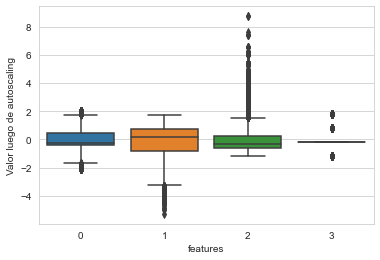

In [70]:
# visualizamos nuestros datos luego del autoscaling
sns.boxplot(data = pd.DataFrame(xscal))
plt.xlabel("features")
plt.ylabel("Valor luego de autoscaling")
plt.show()

### Clustering utilizando K-Means 

In [71]:
# Generamos un modelo de K means con 4 clusters con los datos autoscalados
kmeans = KMeans(n_clusters=4, random_state=0).fit(xscal)

In [72]:
# una vez realizado el clusering, observamos las labels de cluster asignadas a cada muestra
kmeans.labels_

array([0, 2, 2, ..., 1, 1, 2])

In [73]:
# visualizamos los centroides finales de cada cluster. Como pedimos 5 clusters hay 5 centroides.
kmeans.cluster_centers_

array([[-3.01602563e-02,  9.55724654e-01,  2.93465026e+00,
        -7.10215931e-04],
       [ 5.14736231e-02, -1.14267749e+00, -6.54691514e-01,
        -4.37940083e-01],
       [-3.79189729e-03,  6.11069327e-01,  7.56466767e-02,
        -4.85427001e-01],
       [-5.56803740e-02, -1.20276557e-01, -2.48358314e-01,
         1.79804054e+00]])

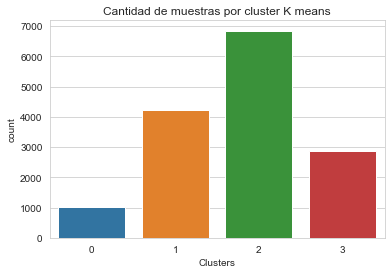

In [74]:
# Contamos cuantas muestras quedaron en cada cluster
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [75]:
# la función dendogram de scipy ofrece visualización del dendograma
Z = linkage(xscal, 'ward') 

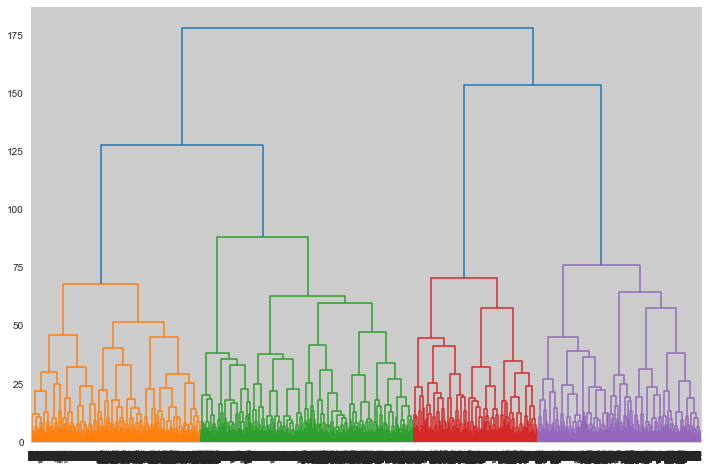

In [66]:
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.show()

### Clustering jerárquico con Scikit Learn


In [76]:
# 4 clusters
hierclus = AgglomerativeClustering(n_clusters=4).fit(xscal)

In [77]:
# Observamos las labels de clusters asignadas a cada muestra
hierclus.labels_

array([3, 2, 2, ..., 0, 0, 2], dtype=int64)

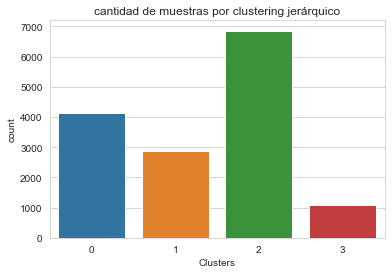

In [78]:
# visualizamos en pantalla cuantas muestras quedaron en cada cluster
sns.countplot(hierclus.labels_)
plt.title("cantidad de muestras por clustering jerárquico")
plt.xlabel("Clusters")
plt.show()

## Medición de la calidad de clusters con Silhouette Score
Utilizando las etiquetas de clustering obtenidas por cada algoritmo computamos el Silhouette score para ver cuan "separados" estan los clusters obtenidos. Cuanto mas alto sea el silhouette score mejor la calidad de cluster obtenida.

In [79]:
# Silhouette score utilizando las etiquetas obtenidas de K-means
metrics.silhouette_score(xscal, kmeans.labels_, metric='euclidean')


0.3114877590388678

In [80]:
# Silhouette score utilizando las etiquetas obtenidas de Hierarchical clustering
metrics.silhouette_score(xscal, hierclus.labels_, metric='euclidean')

0.2818487691601568

## Repetimos los calculos para otros clusters con Kmeans y xscal

In [81]:
dist_cent_1 = []
sil_list_1 = []

for k in range(2, 10):
    # Creamos el objeto de clustering
    cluster = KMeans(n_clusters=k).fit(xscal)
    centers_i = cluster.cluster_centers_ # Centroide de cada cluster
    labels_i = cluster.labels_ # Labels de cada muestra
    sil_score_i = silhouette_score(xscal,labels_i)
    sil_list_1.append(sil_score_i)    

In [82]:
#Visualizamos los resultados para cada cantidad de cluster
print(sil_list_1)

[0.2309989220894597, 0.2903747174831638, 0.3114877590388678, 0.3125034032610488, 0.32329596289092416, 0.3001213330022929, 0.30708323333645043, 0.3084705452714519]


## Repetimos los calculos sin escalar los datos usando Kmeans

In [83]:
# Plot donde iremos mostrando los resultados
dist_cent = []
sil_list = []

for k in range(2, 10):
    # Creamos el objeto de clustering
    cluster = KMeans(n_clusters=k).fit(x)
    centers_i = cluster.cluster_centers_ # Centroide de cada cluster
    labels_i = cluster.labels_ # Labels de cada muestra
    sil_score_i = silhouette_score(x,labels_i)
    sil_list.append(sil_score_i) 
    dist_cent.append(kmeans.inertia_)    

print(sil_list)


[0.748933762328674, 0.6381282488672323, 0.6173267987811563, 0.5601854992174589, 0.5898854897518525, 0.5679073748002361, 0.5812335567506569, 0.5939193797340666]


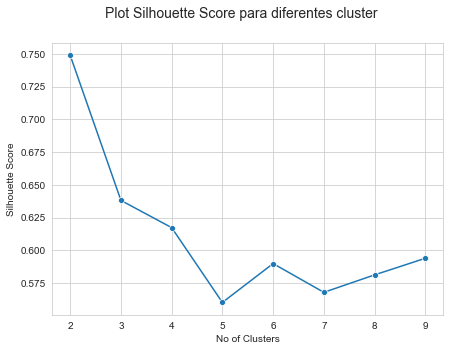

In [84]:
# plt.plot(ssd)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]
plt.figure(figsize=(7,5))
ax= sns.lineplot(y=sil_list,x= range_n_clusters,marker='o')
ax.set(xlabel='No of Clusters', ylabel='Silhouette Score');
plt.suptitle("Plot Silhouette Score para diferentes cluster",fontsize=14);

## Repetimos los calculos sin escalar los datos usando Clustering jerarquico

In [85]:
    # Listas vacias donde guardar las metricas/scores
    dist_cent = []
    sil_list2 = []
    rand_list = []
    dist_clusters = [10,20,30,50,100,150,200]
    affinity_measure = 'euclidean'
    linkage_method = 'ward'

    
    for i , dist_i in enumerate(dist_clusters):
        
        # Creamos el objeto para clustering con sus parametros
        cluster = AgglomerativeClustering(n_clusters=None,
                                          distance_threshold = dist_i,
                                          affinity= affinity_measure,
                                          linkage=linkage_method)

        cluster.fit_predict(x)
        # Obtenemos los labels
        labels_i = cluster.labels_
        n_clusters = len(np.unique(labels_i))
        
        # Para evitar errores si la cantidad de clusters es 1 ...
        if not 1 < n_clusters:
            sil_list2.append(0)
            continue
            
        # Silhouette
        sil_score = silhouette_score(x,labels_i)
        sil_list2.append(sil_score)
        


In [86]:
print(sil_list2)

[0.45981779730253797, 0.5050457264658416, 0.5325815205493858, 0.564741375765181, 0.5837650341233929, 0.6036655322265442, 0.6195701388382083]


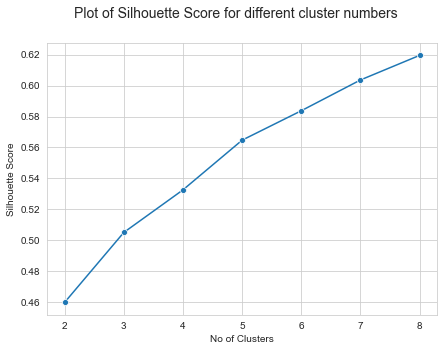

In [87]:
# plt.plot(ssd)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
plt.figure(figsize=(7,5))
ax= sns.lineplot(y=sil_list2,x= range_n_clusters,marker='o')
ax.set(xlabel='No of Clusters', ylabel='Silhouette Score');
plt.suptitle("Plot of Silhouette Score for different cluster numbers",fontsize=14);

## Repetimos los calculos usando Clustering jerarquico para otros cluster con datos escalados


In [88]:
 # Listas vacias donde guardar las metricas/scores
dist_cent = []
sil_list3 = []
rand_list = []
dist_clusters = [10,20,30,50,100,150,200]
affinity_measure = 'euclidean'
linkage_method = 'ward'

    
for i , dist_i in enumerate(dist_clusters):
    # Creamos el objeto para clustering con sus parametros
    cluster = AgglomerativeClustering(n_clusters=None,
                                          distance_threshold = dist_i,
                                          affinity= affinity_measure,
                                          linkage=linkage_method)

    cluster.fit_predict(xscal)
    # Obtenemos los labels
    labels_i = cluster.labels_
    n_clusters = len(np.unique(labels_i))
        
    # Para evitar errores si la cantidad de clusters es 1 ...
    if not 1 < n_clusters:
        sil_list3.append(0)
        continue
            
    # Silhouette
    sil_score = silhouette_score(xscal,labels_i)
    sil_list3.append(sil_score)
        


In [89]:
print(sil_list3)

[0.27109278131052217, 0.2548281452252308, 0.27663134933124267, 0.26357831648338387, 0.2818487691601568, 0.2871185867853455, 0]


## P.C.A.


**Generamos un PCA con los datos luego del autoscaling**

In [90]:
# Definimos la cantidad de componentes --> probar hasta llegar al 80/90%
n_comps = 4
components = range(1,n_comps + 1)
#Creamos el objeto PCA
pca = PCA(n_components=n_comps)

# Ajustamos
pca.fit(xscal)
# Transformamos
xpca = pca.transform(xscal)

# Porcentaje de la varianza explicada por cada Principal Component (PC)
eigenvalues = pca.explained_variance_ratio_

# Suma acumulada
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 



### Eigenvectors ($\mathbf v$)

In [91]:
pd.DataFrame(pca.components_[0:n_comps,:],columns=x.columns) #Armar un dataframe con resultados 

,registro_seccional_descripcion,automotor_anio_modelo,Precio_nominal,titular_genero
0,-0.033033,0.705961,0.702827,-0.081008
1,-0.717070,0.001731,0.044729,0.695562
2,0.696159,0.026132,0.088527,0.711929
3,-0.008999,-0.707767,0.704412,-0.052814


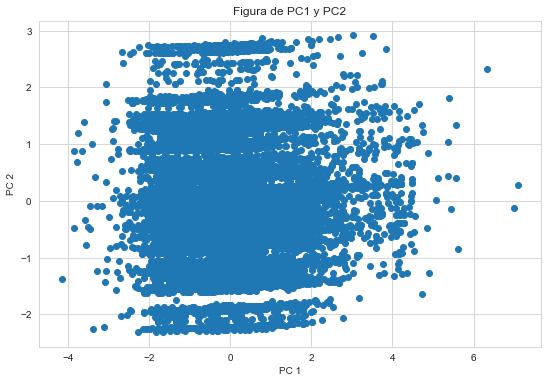

In [92]:
# Scatter plot de los datos, solamente con 2 PC
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1])    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Figura de PC1 y PC2')
plt.show()

In [93]:
rta = 2
kmeans = KMeans(n_clusters = rta,
                random_state = 10).fit(xscal)

In [94]:
# Visualizamos los centroides finales de cada cluster
centers = kmeans.cluster_centers_
centers

array([[-0.04804233,  0.80554774,  0.60163547, -0.1501503 ],
       [ 0.04474299, -0.75022624, -0.56031777,  0.13983863]])

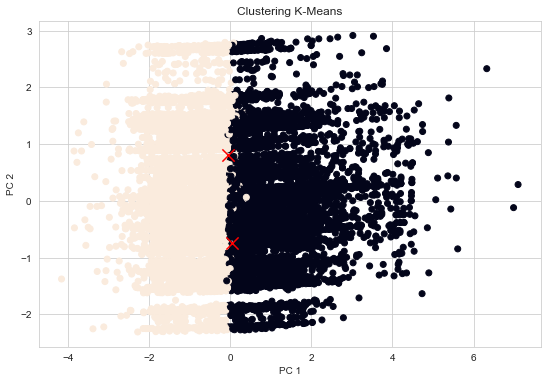

In [95]:
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1],c=kmeans.labels_.astype(float))
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-Means')
plt.show()

## Métricas de K-means

In [96]:
sil_score = silhouette_score(xscal,kmeans.labels_)
#Guardamos los resultados
#results_df = results_df.append({'Cluster':'Kmeans',
 #                               'Sil_':sil_score},ignore_index=True)
print(sil_score)

0.23056507530969228


# PCA + K-Means

## 2 PC

In [97]:

# Cantidad de PC quer queremos
reduced_dim = 2
# Definimos nuetro nuevo X de dimension reducida
xpca_rd = xpca[:,0:reduced_dim]

In [98]:

# Generamos el modelo PCA + K-means
kmeans_rd = KMeans(n_clusters=2, 
                   random_state=10).fit(xpca_rd)

In [99]:
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[ 1.15470402, -0.06623412],
       [-0.82204654,  0.0471528 ]])

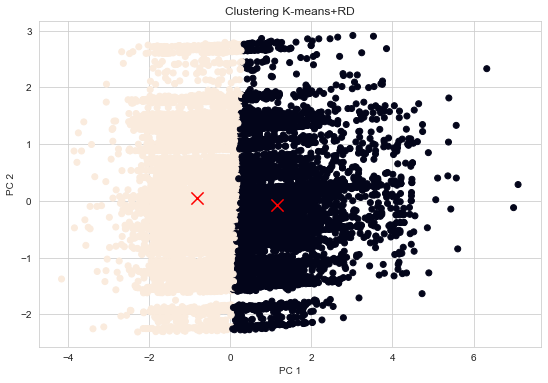

In [100]:
# PCA + K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

### Metricas

In [101]:
# Silhouttte Score
sil_score = silhouette_score(xpca_rd,kmeans_rd.labels_)
print(sil_score)

0.3322901210979121


# Profundizamos sobre el mejor modelo

In [102]:
# Generamos un modelo de K means con 2 clusters con los datos autoscalados 
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

In [103]:
# una vez realizado el clusering, observamos las labels de cluster asignadas a cada muestra
cluster_2_labels = kmeans.labels_
print(cluster_2_labels)

[1 0 0 ... 0 0 0]


In [104]:
# visualizamos los centroides finales de cada cluster. Como pedimos 5 clusters hay 5 centroides.
kmeans.cluster_centers_

array([[5.26261483e+01, 2.00587301e+03, 8.58060484e+05, 1.16682590e+00],
       [5.19939668e+01, 2.01365460e+03, 3.39725867e+06, 1.13574661e+00]])

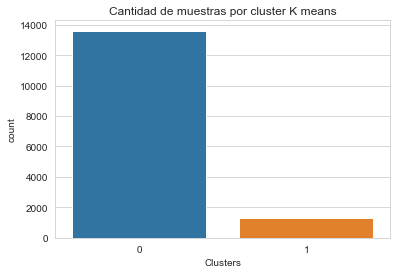

In [105]:
# Contamos cuantas muestras quedaron en cada cluster
sns.countplot(cluster_2_labels)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [106]:
# la función dendogram de scipy ofrece visualización del dendograma
Z = linkage(x, 'ward') #Pasarle un subset de datos, rango entre 1 -1000 entre corchetes

In [107]:
# Silhouette score utilizando las etiquetas obtenidas de K-means
metrics.silhouette_score(x, cluster_2_labels, metric='euclidean')

0.748933762328674

In [108]:
# assign the label
x['cluster_id'] = cluster_2_labels
x.head()

,registro_seccional_descripcion,automotor_anio_modelo,Precio_nominal,titular_genero,cluster_id
0,4,2017,8000000,2,1
1,45,2020,1900000,1,0
2,45,2020,1750000,1,0
3,64,2019,1800000,1,0
4,45,2020,2200000,1,1


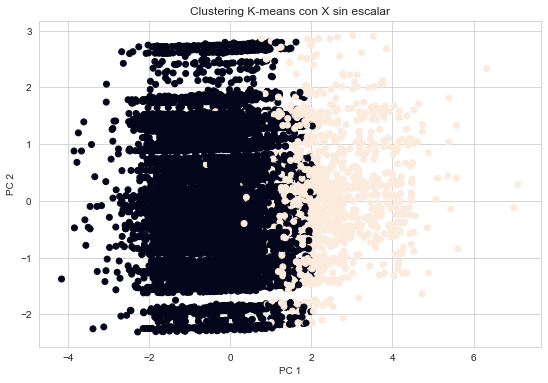

In [109]:
# PCA + K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=x["cluster_id"])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means con X sin escalar')
plt.show()

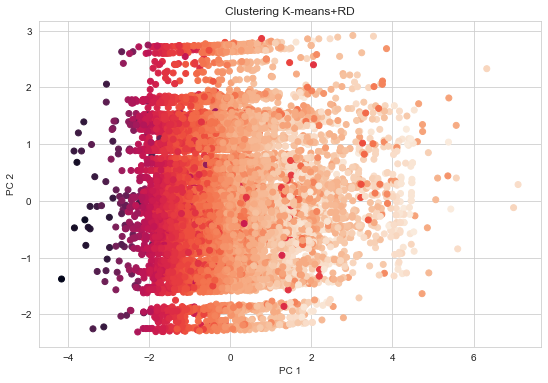

In [110]:
# PCA + K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=x["automotor_anio_modelo"])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

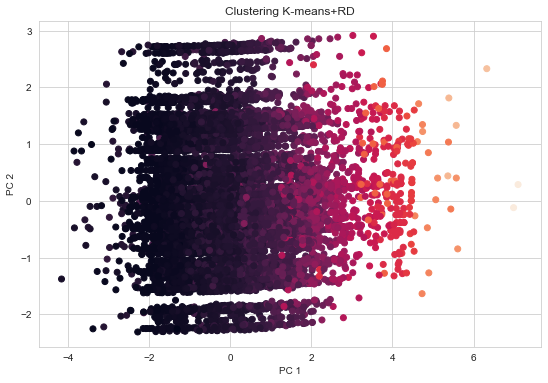

In [111]:
# PCA + K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=x["Precio_nominal"])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

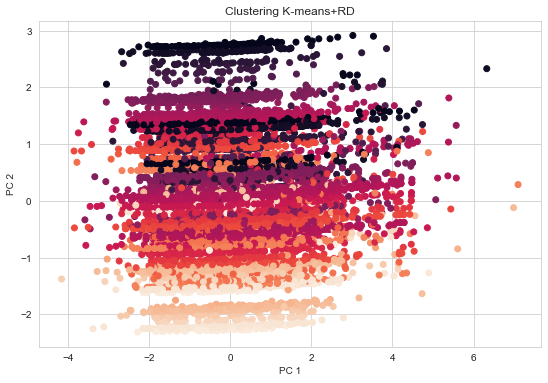

In [112]:
# PCA + K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=x["registro_seccional_descripcion"])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

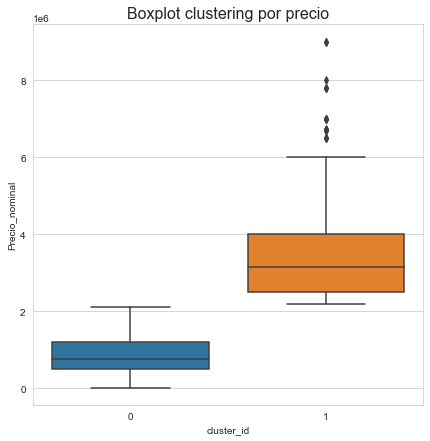

In [113]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot clustering por precio",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="Precio_nominal", data=x);

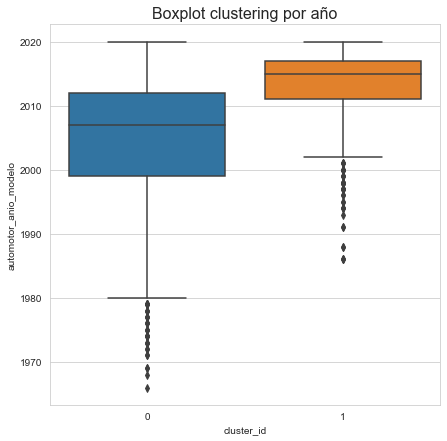

In [114]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot clustering por año",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="automotor_anio_modelo", data=x);

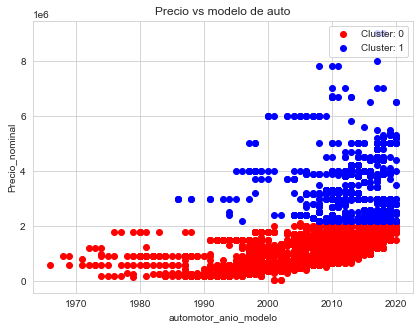

In [115]:

color=['r','b','g','orange']
clusters= x.cluster_id.unique()
chosen_clusters = 2
plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
ax.title.set_text("Precio vs modelo de auto")
ax.set_xlabel("automotor_anio_modelo")
ax.set_ylabel("Precio_nominal")

for k in range(chosen_clusters):
    p1 = plt.scatter(x[x.cluster_id == k].automotor_anio_modelo, x[x.cluster_id == k].Precio_nominal,c=color[k],label="Cluster: "+str(k))

ax.legend(loc=1)  

